In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import pandas as pd
import random

# plt.style.use('seaborn')

Load Dataset and check datatypes

In [28]:
df = pd.read_csv("FRS_2023-12-14T1607.csv")
# print(df)
##  Shorten col names
df.rename(columns = {'ALSFRS Data Participant ID':'ID'}, inplace = True)
df.rename(columns = {'ALSFRS Data ALSFRS Entry Date':'Date'}, inplace = True)
df.rename(columns = {'ALSFRS Data Days Since Onset':'Onset'}, inplace = True)
df.rename(columns = {'ALSFRS Data Frs Climbing Stairs':'Stairs'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Cutting Food':'Cutting'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Dressing Hygiene':'Dressing'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Dyspnea':'Dyspnea'}, inplace = True) ##Does not exist
df.rename(columns = {'ALSFRS Data FRS Handwriting':'Handwriting'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Orthopnea':'Ortho'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Respiratory Insufficiency':'Low_O2'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Salivation':'Saliva'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Speech':'Speech'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Swallowing':'Swallowing'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Turning in Bed':'Turning'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Walking':'Walking'}, inplace = True)
df.rename(columns = {'ALSFRS Data Total Score':'Total'}, inplace = True)
df = df[['ID', 'Date', 'Onset','Stairs', 'Cutting', 'Dressing', 'Dyspnea', 'Handwriting', 'Ortho', 
         'Low_O2', 'Saliva', 'Speech', 'Swallowing', 'Turning', 'Walking', 'Total']]
df= df.sort_values(by=['ID'], ascending=True)
print(df.iloc[0:5,:])
print(df.dtypes) ## Show data types

         ID        Date   Onset  Stairs  Cutting  Dressing  Dyspnea  \
21178  47.0  2015-04-20  1450.0     2.0      4.0       3.0      4.0   
20449  47.0  2015-09-29  1612.0     0.0      4.0       3.0      4.0   
20906  47.0  2015-06-25  1516.0     2.0      4.0       3.0      4.0   
17379  47.0  2017-01-24  2095.0     0.0      1.0       1.0      4.0   
19864  47.0  2016-01-10  1715.0     0.0      4.0       2.0      4.0   

       Handwriting  Ortho  Low_O2  Saliva  Speech  Swallowing  Turning  \
21178          4.0    4.0     4.0     4.0     4.0         4.0      3.0   
20449          4.0    4.0     4.0     4.0     4.0         4.0      2.0   
20906          4.0    4.0     4.0     4.0     4.0         4.0      3.0   
17379          3.0    4.0     4.0     4.0     4.0         4.0      1.0   
19864          4.0    4.0     4.0     4.0     4.0         4.0      2.0   

       Walking  Total  
21178      2.0   42.0  
20449      2.0   39.0  
20906      2.0   42.0  
17379      0.0   30.0  
19864   

Get stats

In [29]:
print(df)

           ID        Date   Onset  Stairs  Cutting  Dressing  Dyspnea  \
21178    47.0  2015-04-20  1450.0     2.0      4.0       3.0      4.0   
20449    47.0  2015-09-29  1612.0     0.0      4.0       3.0      4.0   
20906    47.0  2015-06-25  1516.0     2.0      4.0       3.0      4.0   
17379    47.0  2017-01-24  2095.0     0.0      1.0       1.0      4.0   
19864    47.0  2016-01-10  1715.0     0.0      4.0       2.0      4.0   
...       ...         ...     ...     ...      ...       ...      ...   
108    2150.0  2023-11-26   209.0     4.0      4.0       4.0      4.0   
107    2151.0  2023-11-26   543.0     2.0      1.0       1.0      3.0   
91     2152.0  2023-11-28   453.0     0.0      4.0       2.0      4.0   
48     2155.0  2023-12-06  4144.0     3.0      4.0       3.0      4.0   
21566     NaN         NaN     NaN     NaN      NaN       NaN      NaN   

       Handwriting  Ortho  Low_O2  Saliva  Speech  Swallowing  Turning  \
21178          4.0    4.0     4.0     4.0     4.0

In [30]:
df.describe()

,ID,Onset,Stairs,Cutting,Dressing,Dyspnea,Handwriting,Ortho,Low_O2,Saliva,Speech,Swallowing,Turning,Walking,Total
count,21566.000000,20458.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000
mean,898.798340,1996.151286,1.786933,2.309932,2.268385,3.143838,2.536817,3.445099,3.448020,3.188538,2.940833,3.162617,2.531438,2.251553,33.014004
std,591.090439,1686.058460,1.516123,1.411365,1.256277,1.158999,1.345976,0.922966,0.934419,1.048055,1.250504,1.171117,1.232307,1.174865,10.337015
min,47.000000,-42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,384.000000,848.000000,0.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,1.000000,27.000000
50%,748.000000,1463.500000,2.000000,3.000000,2.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000,35.000000
75%,1404.000000,2572.750000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,41.000000
max,2155.000000,15208.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,48.000000


Histograms

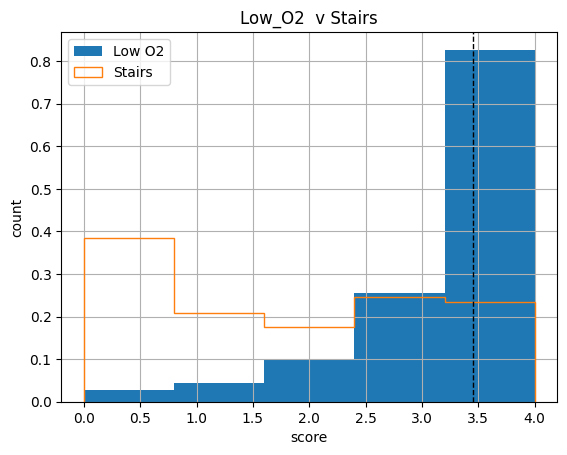

In [31]:
df['Low_O2'].hist(bins = 5, density = 'True', label = 'Low O2')
df['Stairs'].hist(bins = 5, density = 'True', histtype = 'step', label ='Stairs')
plt.axvline(df['Low_O2'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel("score")
plt.ylabel("count")
plt.title('Low_O2  v Stairs')
plt.legend()
plt.show()

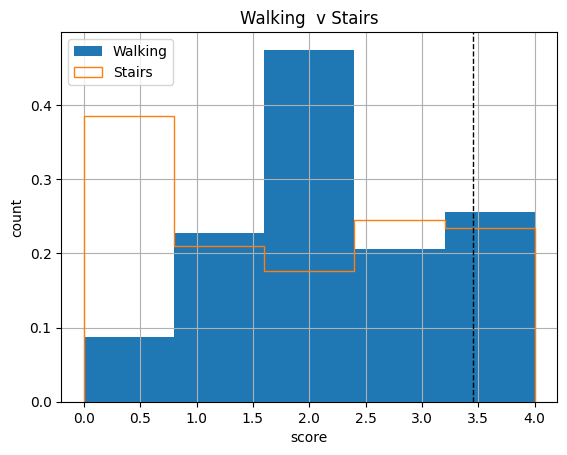

In [32]:
df['Walking'].hist(bins = 5, density = 'True', label ='Walking')
df['Stairs'].hist(bins = 5, density = 'True', histtype = 'step', label ='Stairs')
plt.axvline(df['Low_O2'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel("score")
plt.ylabel("count")
plt.title('Walking  v Stairs')
plt.legend()
plt.show()


Text(0, 0.5, 'Total FRS Value')

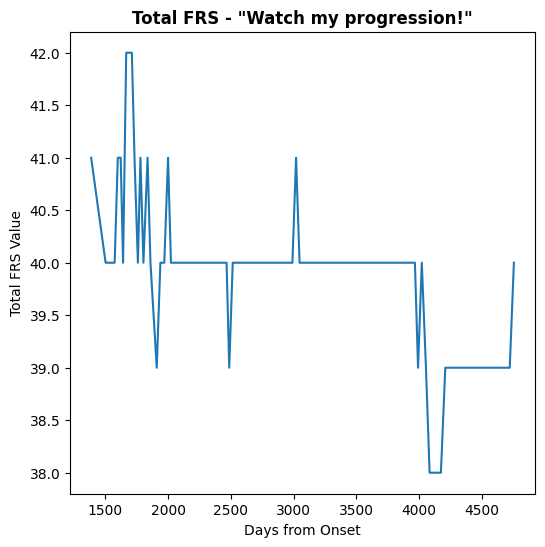

In [55]:
df65= df.loc[df['ID'] == 65].sort_values(by=['Date'], ascending=True)

fig, ax = plt.subplots(1, 1, figsize = (6, 6))

ax.plot(df65.Onset, df65.Total)
ax.title.set_text('Total FRS - "Watch my progression!"')
ax.title.set_weight('bold')
ax.set_xlabel('Days from Onset')
ax.set_ylabel('Total FRS Value')

